In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from mysql.connector import Error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
def connect_to_mysql():
    
    try:
        # 1. Establish the connection
        connection = mysql.connector.connect(
        host='127.0.0.1',  
        user='root',       
        password='Your_Password', 
        port=3306,  
        database='market_tracker'
        )
        if connection.is_connected():
                        
            query = "SELECT * FROM stock_prices"
            df = pd.read_sql(query, connection)
            
            return df
            
    except Error as e:
        print(f"Error while connecting to MySQL: {e}")


In [5]:
df = connect_to_mysql()

C:\Users\Ehsaan\AppData\Local\Temp\ipykernel_11344\1236348610.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [6]:
df.head()

,id,ticker,price,volume,timestamp
0,1,MSFT,465.95,None,2026-01-25 16:32:37
1,2,TSLA,449.06,None,2026-01-25 16:32:38
2,3,BTC,8107117.85,None,2026-01-25 16:32:40
3,4,GOLD,43.11,None,2026-01-25 16:32:42
4,5,NVDA,187.68,None,2026-01-25 16:32:43


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         5 non-null      int64         
 1   ticker     5 non-null      object        
 2   price      5 non-null      float64       
 3   volume     0 non-null      object        
 4   timestamp  5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 332.0+ bytes


In [8]:
df.tail()

,id,ticker,price,volume,timestamp
0,1,MSFT,465.95,None,2026-01-25 16:32:37
1,2,TSLA,449.06,None,2026-01-25 16:32:38
2,3,BTC,8107117.85,None,2026-01-25 16:32:40
3,4,GOLD,43.11,None,2026-01-25 16:32:42
4,5,NVDA,187.68,None,2026-01-25 16:32:43


In [9]:
df['price'].describe()

count    5.000000e+00
mean     1.621653e+06
std      3.625485e+06
min      4.311000e+01
25%      1.876800e+02
50%      4.490600e+02
75%      4.659500e+02
max      8.107118e+06
Name: price, dtype: float64

In [10]:
df['price'].sum()

8108263.649999999

In [11]:
df_stocks = df[df['ticker'] != 'BTC'].copy()
df_stocks.head()

,id,ticker,price,volume,timestamp
0,1,MSFT,465.95,None,2026-01-25 16:32:37
1,2,TSLA,449.06,None,2026-01-25 16:32:38
3,4,GOLD,43.11,None,2026-01-25 16:32:42
4,5,NVDA,187.68,None,2026-01-25 16:32:43


In [12]:
sns.set_theme(style="whitegrid")

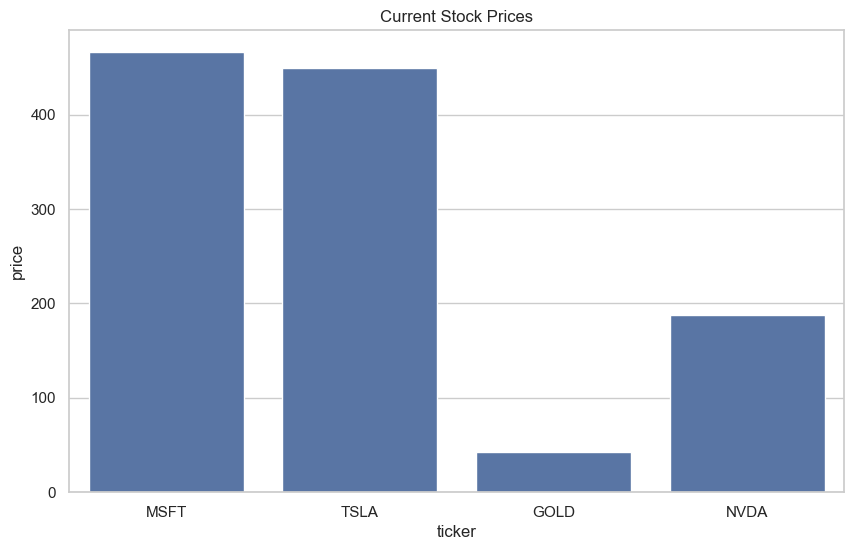

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(
    #data=df,
    data=df_stocks,
    x='ticker',
    y='price'
)
plt.title('Current Stock Prices')
plt.show()

In [14]:
df_stocks['moving_avg'] = df_stocks.groupby('ticker')["price"].rolling(window=3).mean().reset_index(level=0, drop=True)

In [15]:
df_stocks.columns

Index(['id', 'ticker', 'price', 'volume', 'timestamp', 'moving_avg'], dtype='object')

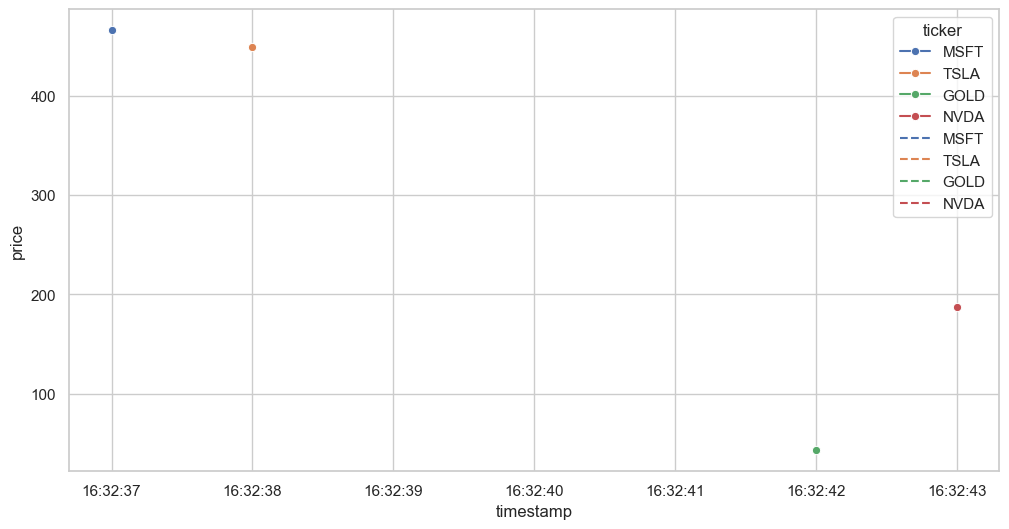

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_stocks, x='timestamp', y='price', hue='ticker', marker='o')
sns.lineplot(data=df_stocks, x='timestamp', y='moving_avg', hue='ticker', linestyle='--')

plt.show()

In [ ]:
df_stocks['target'] = df_stocks.groupby('ticker')['price'].shift(-1)

SyntaxError: invalid syntax (2937671630.py, line 3)

In [ ]:
#Feature Engineering
X = df_stocks[['moving_avg'], ['price'], ['timestamp']]
y = df_stocks['target']